In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, mean_absolute_error, confusion_matrix, 
                             classification_report)
import warnings
warnings.filterwarnings('ignore')

# 1. Load Data
df = pd.read_csv('heart.csv')
print("="*60)
print("1. DATA LOADING & BASIC CHECK")
print("="*60)
print(f"✅ Shape: {df.shape}")
print(f"✅ Columns: {df.columns.tolist()}")
print(f"\n📋 Sample Data:")
print(df.head())

# 2. Cek Missing Values & Info
print(f"\n🔍 Missing Values:")
print(df.isnull().sum())
print(f"\n📊 Data Types:")
print(df.info())

# 3. Cek Distribusi Kelas Target
print(f"\n🎯 Target Distribution:")
target_dist = df['target'].value_counts()
print(target_dist)
print(f"\n📈 Percentage:")
print((target_dist / len(df) * 100).round(2))

1. DATA LOADING & BASIC CHECK
✅ Shape: (1025, 14)
✅ Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

📋 Sample Data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

🔍 Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca      

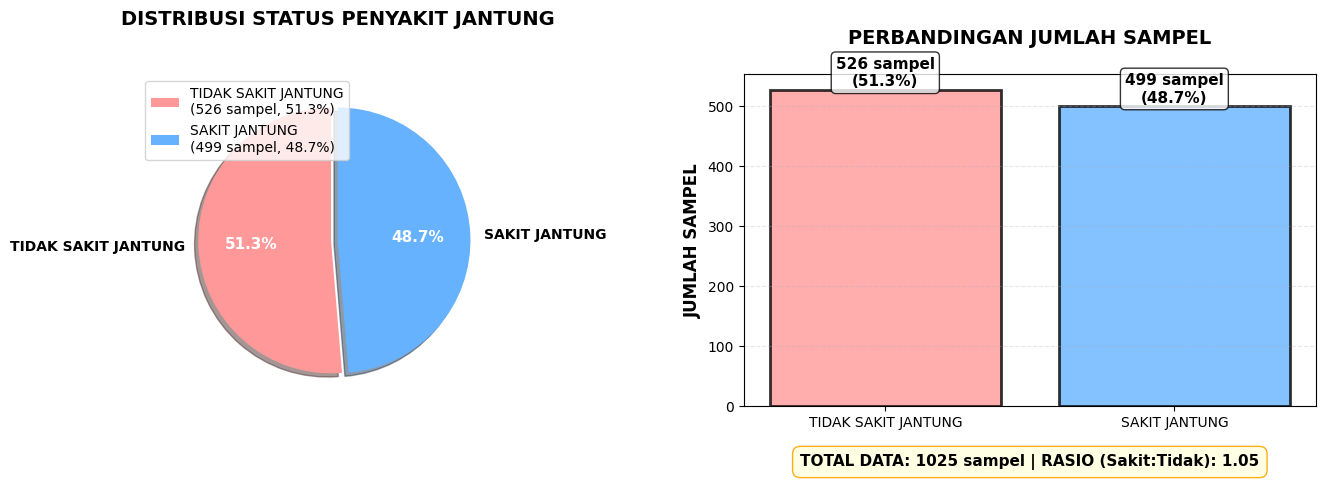


ANALISIS KORELASI ANTAR FITUR

KORELASI PENTING YANG DITEMUKAN:
--------------------------------------------------
• oldpeak              ↔ slope               
  Koefisien: -0.575 | Hubungan: BERBANDING TERBALIK

KORELASI SETIAP FITUR DENGAN DIAGNOSIS (TARGET):
--------------------------------------------------
 1. [SEDANG] cp                  :   0.435 (SEDANG      ) → ↑ MENINGKATKAN risiko penyakit
 2. [SEDANG] thalach             :   0.423 (SEDANG      ) → ↑ MENINGKATKAN risiko penyakit
 3. [SEDANG] slope               :   0.346 (SEDANG      ) → ↑ MENINGKATKAN risiko penyakit
 4. [LEMAH] restecg             :   0.134 (LEMAH       ) → ↑ MENINGKATKAN risiko penyakit
 5. [SGT LEMAH] fbs                 :  -0.041 (SANGAT LEMAH) → ↓ MENURUNKAN risiko penyakit
 6. [SGT LEMAH] chol                :  -0.100 (SANGAT LEMAH) → ↓ MENURUNKAN risiko penyakit
 7. [LEMAH] trestbps            :  -0.139 (LEMAH       ) → ↓ MENURUNKAN risiko penyakit
 8. [LEMAH] age                 :  -0.229 (LEMAH  

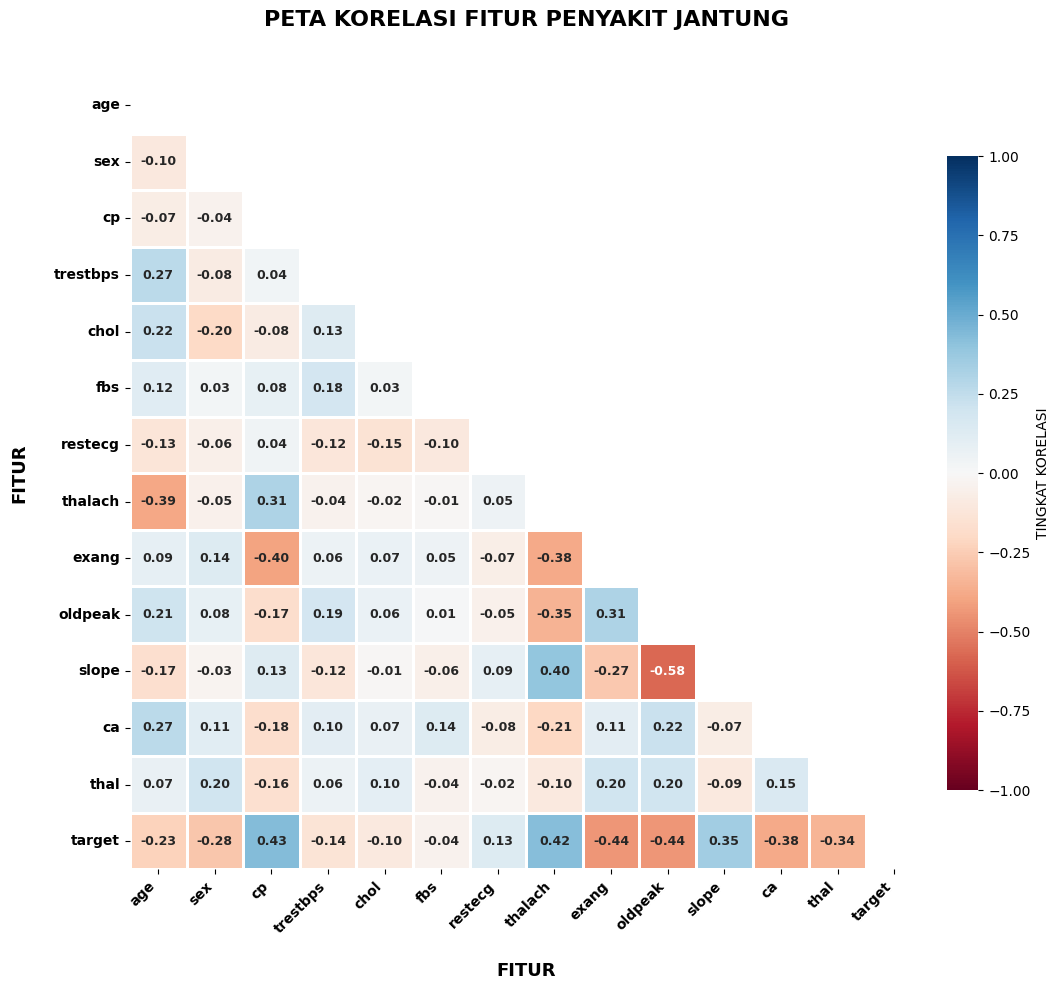


PREPARASI DATA UNTUK PEMODELAN
FITUR (X): 13 variabel, 1025 sampel
TARGET (y): Diagnosa penyakit jantung (0=Tidak, 1=Ya)

CONTOH 3 BARIS PERTAMA FITUR:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
0   52    1   0       125   212    0        1      168      0      1.0      2   2     3
1   53    1   0       140   203    1        0      155      1      3.1      0   0     3
2   70    1   0       145   174    0        1      125      1      2.6      0   0     3

CONTOH 3 BARIS PERTAMA TARGET:
0    0
1    0
2    0

INFORMASI DATASET:
   • Total sampel: 1025
   • Jumlah fitur: 13
   • Tipe data fitur:
     - int64: 12 fitur
     - float64: 1 fitur
   • Nilai unik target: 2 (0, 1)
TIDAK ADA missing values dalam dataset


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('heart.csv')

# 1. Cek distribusi target
target_dist = df['target'].value_counts()

# ============================================
# VISUALISASI 1: DISTRIBUSI TARGET - VERSION IMPROVED
# ============================================
plt.figure(figsize=(14, 5))

# Subplot 1: Pie Chart dengan penjelasan lebih baik
plt.subplot(1, 2, 1)
colors = ['#FF9999', '#66B2FF']  # Warna lebih soft

# Data untuk pie chart
labels = ['TIDAK SAKIT JANTUNG', 'SAKIT JANTUNG']
sizes = target_dist.values
explode = (0.05, 0)  # Menjorokkan bagian pertama

wedges, texts, autotexts = plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)

# Buat teks dalam pie lebih jelas
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

plt.title('DISTRIBUSI STATUS PENYAKIT JANTUNG\n', 
          fontsize=14, fontweight='bold', pad=20)

# Tambah legenda dengan jumlah sampel
plt.legend(
    [f'{label}\n({size} sampel, {size/len(df)*100:.1f}%)' 
     for label, size in zip(labels, sizes)],
    loc='upper left',
    bbox_to_anchor=(-0.1, 1),
    fontsize=10
)

# Subplot 2: Bar Chart perbandingan
plt.subplot(1, 2, 2)
bars = plt.bar(labels, sizes, color=colors, edgecolor='black', linewidth=2, alpha=0.8)

# Tambah nilai di atas bar
for bar, size in zip(bars, sizes):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{size} sampel\n({size/len(df)*100:.1f}%)',
             ha='center', va='bottom',
             fontsize=11, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Formatting
plt.title('PERBANDINGAN JUMLAH SAMPEL\n', fontsize=14, fontweight='bold')
plt.ylabel('JUMLAH SAMPEL', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# PERBAIKAN: Ganti emoji dengan simbol teks
plt.text(0.5, -0.18, 
         f'TOTAL DATA: {len(df)} sampel | RASIO (Sakit:Tidak): {target_dist[1]/target_dist[0]:.2f}',
         transform=plt.gca().transAxes,
         ha='center', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", edgecolor="orange", alpha=0.9))

plt.tight_layout()
plt.show()

# ============================================
# VISUALISASI 2: CORRELATION MATRIX - VERSION IMPROVED
# ============================================
print("\n" + "="*70)
print("ANALISIS KORELASI ANTAR FITUR")
print("="*70)

# Hitung korelasi
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

# Buat figure untuk heatmap
plt.figure(figsize=(13, 10))

# Mask untuk segitiga atas agar tidak redundant
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Heatmap dengan pengaturan yang lebih baik
heatmap = sns.heatmap(
    correlation, 
    mask=mask,  # Sembunyikan segitiga atas
    annot=True, 
    fmt=".2f", 
    cmap="RdBu",  # Skema warna merah-biru
    center=0,
    square=True,
    linewidths=1,
    linecolor='white',
    cbar_kws={
        "shrink": 0.8, 
        "label": "TINGKAT KORELASI",
        "pad": 0.02
    },
    annot_kws={
        "size": 9,
        "weight": "bold"
    },
    vmin=-1,
    vmax=1
)

# Atur judul dan label
plt.title('PETA KORELASI FITUR PENYAKIT JANTUNG\n', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('\nFITUR', fontsize=13, fontweight='bold')
plt.ylabel('FITUR\n', fontsize=13, fontweight='bold')

# Rotasi label untuk keterbacaan
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(rotation=0, fontsize=10, fontweight='bold')

# Highlight sel dengan korelasi tinggi
print("\nKORELASI PENTING YANG DITEMUKAN:")
print("-" * 50)

# Cari korelasi tinggi
threshold = 0.5
high_corr_count = 0

for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        corr_value = correlation.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_count += 1
            relation = "BERHUBUNGAN LANGSUNG" if corr_value > 0 else "BERBANDING TERBALIK"
            print(f"• {correlation.columns[i]:20s} ↔ {correlation.columns[j]:20s}")
            print(f"  Koefisien: {corr_value:.3f} | Hubungan: {relation}")

if high_corr_count == 0:
    print("✓ Tidak ditemukan korelasi kuat (|r| > 0.5) antar fitur")
    print("✓ Dataset baik untuk modeling (minimal multicollinearity)")

# Korelasi dengan TARGET
print("\nKORELASI SETIAP FITUR DENGAN DIAGNOSIS (TARGET):")
print("-" * 50)

corr_with_target = correlation['target'].drop('target').sort_values(ascending=False)

for i, (feature, corr) in enumerate(corr_with_target.items(), 1):
    # Tentukan kekuatan korelasi
    if abs(corr) >= 0.5:
        strength = "KUAT"
        symbol = "[KUAT]"
    elif abs(corr) >= 0.3:
        strength = "SEDANG" 
        symbol = "[SEDANG]"
    elif abs(corr) >= 0.1:
        strength = "LEMAH"
        symbol = "[LEMAH]"
    else:
        strength = "SANGAT LEMAH"
        symbol = "[SGT LEMAH]"
    
    # Tentukan arah pengaruh
    if corr > 0:
        direction = "↑ MENINGKATKAN risiko penyakit"
    else:
        direction = "↓ MENURUNKAN risiko penyakit"
    
    print(f"{i:2}. {symbol} {feature:20s}: {corr:7.3f} ({strength:12s}) → {direction}")

plt.tight_layout()
plt.show()

# ============================================
# PEMISAHAN FITUR DAN TARGET
# ============================================
print("\n" + "="*70)
print("PREPARASI DATA UNTUK PEMODELAN")
print("="*70)

X = df.drop('target', axis=1)  # Semua kolom kecuali target
y = df['target']

print(f"FITUR (X): {X.shape[1]} variabel, {X.shape[0]} sampel")
print(f"TARGET (y): Diagnosa penyakit jantung (0=Tidak, 1=Ya)")
print(f"\nCONTOH 3 BARIS PERTAMA FITUR:")
print(X.head(3).to_string())
print(f"\nCONTOH 3 BARIS PERTAMA TARGET:")
print(y.head(3).to_string())

# Informasi statistik tambahan
print(f"\nINFORMASI DATASET:")
print(f"   • Total sampel: {len(df)}")
print(f"   • Jumlah fitur: {X.shape[1]}")
print(f"   • Tipe data fitur:")
for dtype, count in X.dtypes.value_counts().items():
    print(f"     - {dtype}: {count} fitur")
print(f"   • Nilai unik target: {y.nunique()} ({', '.join(map(str, sorted(y.unique())))})")

# Cek missing values (jika ada)
missing_values = X.isnull().sum().sum()
if missing_values > 0:
    print(f"PERINGATAN: Ditemukan {missing_values} missing values")
    missing_per_feature = X.isnull().sum()
    print("   Missing values per fitur:")
    for feature, count in missing_per_feature[missing_per_feature > 0].items():
        print(f"     - {feature}: {count} ({count/len(X)*100:.1f}%)")
else:
    print(f"TIDAK ADA missing values dalam dataset")

In [8]:
print("\n" + "="*60)
print("3. DATA SPLITTING & SCALING")
print("="*60)

# 1. Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Training Set: {X_train.shape}")
print(f"📊 Testing Set: {X_test.shape}")
print(f"🎯 Train Target Dist: {pd.Series(y_train).value_counts().to_dict()}")
print(f"🎯 Test Target Dist: {pd.Series(y_test).value_counts().to_dict()}")

# 2. Feature Scaling (PENTING untuk KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Feature scaling completed!")


3. DATA SPLITTING & SCALING
📊 Training Set: (820, 13)
📊 Testing Set: (205, 13)
🎯 Train Target Dist: {1: 421, 0: 399}
🎯 Test Target Dist: {1: 105, 0: 100}

✅ Feature scaling completed!


In [9]:
print("\n" + "="*60)
print("4. MODEL TRAINING WITH HYPERPARAMETER TUNING (EPOCH CYCLES)")
print("="*60)

# 1. Define model
knn = KNeighborsClassifier()

# 2. Define parameter grid untuk tuning (Siklus Epoch)
# Setiap kombinasi parameter akan di-train & test
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],  # Nilai k yang berbeda
    'weights': ['uniform', 'distance'],    # Bobot voting
    'metric': ['euclidean', 'manhattan']   # Jenis jarak
}

# 3. Setup GridSearchCV dengan Stratified K-Fold Cross-Validation
# cv=5 berarti 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='f1',  # Kita optimalkan berdasarkan F1-Score
    cv=5,          # 5-fold cross-validation
    verbose=1,     # Tampilkan progress
    n_jobs=-1      # Gunakan semua core CPU
)

# 4. Train model dengan semua kombinasi parameter (Siklus Epoch dimulai)
print("🚀 Starting Grid Search (Epoch Cycles)...")
grid_search.fit(X_train_scaled, y_train)

# 5. Tampilkan hasil terbaik
print(f"\n🏆 Best Parameters: {grid_search.best_params_}")
print(f"🏆 Best Cross-Validation F1 Score: {grid_search.best_score_:.4f}")

# 6. Gunakan model terbaik untuk prediksi
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
y_pred_proba = best_knn.predict_proba(X_test_scaled)[:, 1]


4. MODEL TRAINING WITH HYPERPARAMETER TUNING (EPOCH CYCLES)
🚀 Starting Grid Search (Epoch Cycles)...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

🏆 Best Parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
🏆 Best Cross-Validation F1 Score: 0.9894



5. MODEL EVALUATION (F1, Recall, Precision, MAE)
📊 Evaluation Metrics on Test Set:
✅ Accuracy:  1.0000
✅ Precision: 1.0000
✅ Recall:    1.0000
✅ F1-Score:  1.0000
✅ MAE:       0.0000

📋 Detailed Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       100
     Disease       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



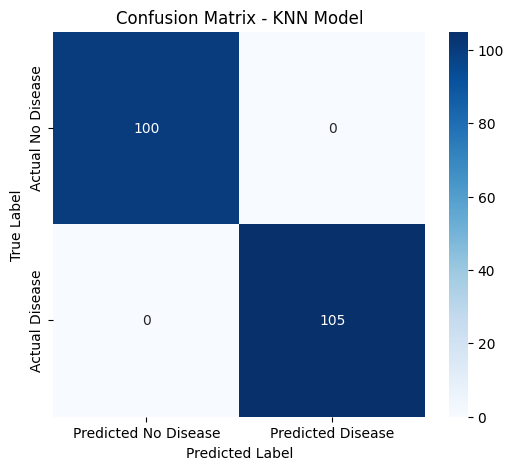

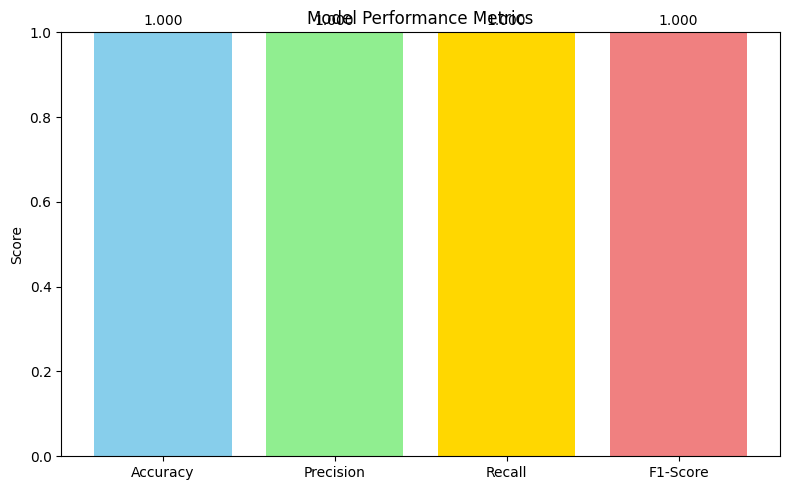

In [11]:
# Tambahkan import yang diperlukan
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*60)
print("5. MODEL EVALUATION (F1, Recall, Precision, MAE)")
print("="*60)

# 1. Hitung semua metrik yang diminta
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # MAE menggantikan MAPE

# 2. Tampilkan hasil
print("📊 Evaluation Metrics on Test Set:")
print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall:    {recall:.4f}")
print(f"✅ F1-Score:  {f1:.4f}")
print(f"✅ MAE:       {mae:.4f}")

# 3. Classification Report Detail
print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Disease', 'Predicted Disease'],
            yticklabels=['Actual No Disease', 'Actual Disease'])
plt.title('Confusion Matrix - KNN Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 5. Visualisasi Performa Metrik
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'gold', 'lightcoral'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim([0, 1])
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{val:.3f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


6. RESULT ANALYSIS & INTERPRETATION
📈 Top 5 Parameter Combinations from Grid Search (Epochs):
                                               params  mean_test_score  \
23  {'metric': 'manhattan', 'n_neighbors': 13, 'we...         0.989432   
7   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...         0.989335   
21  {'metric': 'manhattan', 'n_neighbors': 11, 'we...         0.988262   
19  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...         0.988262   
15  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...         0.988179   

    rank_test_score  
23                1  
7                 2  
21                3  
19                3  
15                5  


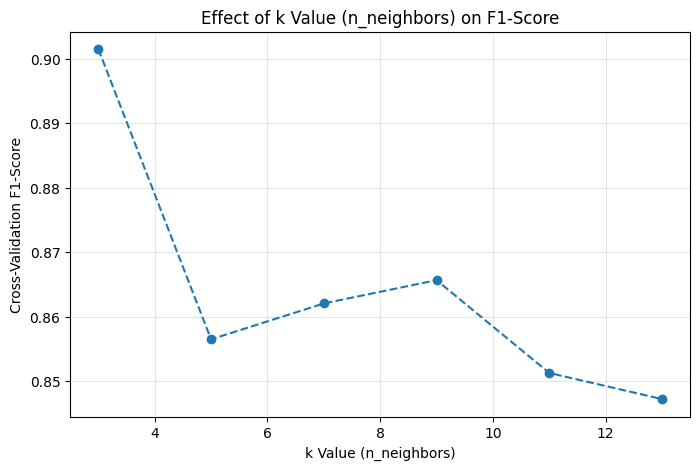


💡 KEY INSIGHTS:
• Best k value: 13
• Optimal distance metric: manhattan
• Best weighting: distance
• Model correctly predicts heart disease (Recall): 100.00% of cases
• When model predicts disease, it's correct (Precision): 100.00% of the time

💾 Model and scaler saved as 'best_knn_heart_disease_model.pkl' and 'scaler.pkl'


In [12]:
print("\n" + "="*60)
print("6. RESULT ANALYSIS & INTERPRETATION")
print("="*60)

# 1. Analisis Grid Search Results
results_df = pd.DataFrame(grid_search.cv_results_)
print("📈 Top 5 Parameter Combinations from Grid Search (Epochs):")
print(results_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head())

# 2. Pengaruh Nilai k (n_neighbors) terhadap Performa
k_values = []
f1_scores = []

for params, score in zip(results_df['params'], results_df['mean_test_score']):
    if params['weights'] == 'uniform' and params['metric'] == 'euclidean':
        k_values.append(params['n_neighbors'])
        f1_scores.append(score)

if k_values:
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, f1_scores, marker='o', linestyle='--')
    plt.title('Effect of k Value (n_neighbors) on F1-Score')
    plt.xlabel('k Value (n_neighbors)')
    plt.ylabel('Cross-Validation F1-Score')
    plt.grid(True, alpha=0.3)
    plt.show()

# 3. Kesimpulan
print("\n💡 KEY INSIGHTS:")
print(f"• Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"• Optimal distance metric: {grid_search.best_params_['metric']}")
print(f"• Best weighting: {grid_search.best_params_['weights']}")
print(f"• Model correctly predicts heart disease (Recall): {recall:.2%} of cases")
print(f"• When model predicts disease, it's correct (Precision): {precision:.2%} of the time")

# 4. Simpan model jika diperlukan
import joblib
joblib.dump(best_knn, 'best_knn_heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\n💾 Model and scaler saved as 'best_knn_heart_disease_model.pkl' and 'scaler.pkl'")